# Diabetes prediction using machine learning

#### importing necessary packages

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

#### reading the dataset and getting getting started with analysis

In [2]:
dataset=pd.read_csv("diabetes.csv")

In [3]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataset["Age"].max()

81

In [5]:
dataset.shape

(768, 9)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Observation:
##### 1) No object type values
##### 2) No null values
##### 3) there is high standard deviation in some columns
##### 4) Almost every feature contains false values

#### Converting Age into categorical variable

In [9]:
dataset['Age'].median()

29.0

In [10]:
dataset.loc[dataset['Age']>=29, 'Age_mod']=0
dataset.loc[dataset['Age']< 29, 'Age_mod']=1

In [11]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_mod
0,6,148,72,35,0,33.6,0.627,50,1,0.0
1,1,85,66,29,0,26.6,0.351,31,0,0.0
2,8,183,64,0,0,23.3,0.672,32,1,0.0
3,1,89,66,23,94,28.1,0.167,21,0,1.0
4,0,137,40,35,168,43.1,2.288,33,1,0.0


In [12]:
dataset['Age_mod'].value_counts()

Age_mod
0.0    401
1.0    367
Name: count, dtype: int64

## Correlation

In [13]:
dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_mod
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898,-0.577589
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581,-0.246323
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068,-0.197117
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752,0.089299
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548,0.035277
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695,-0.093753
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844,-0.050555
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356,-0.756872
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000,-0.312100
Age_mod,-0.577589,-0.246323,-0.197117,0.089299,0.035277,-0.093753,-0.050555,-0.756872,-0.312100,1.000000


C:\Users\kiran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kiran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kiran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kiran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

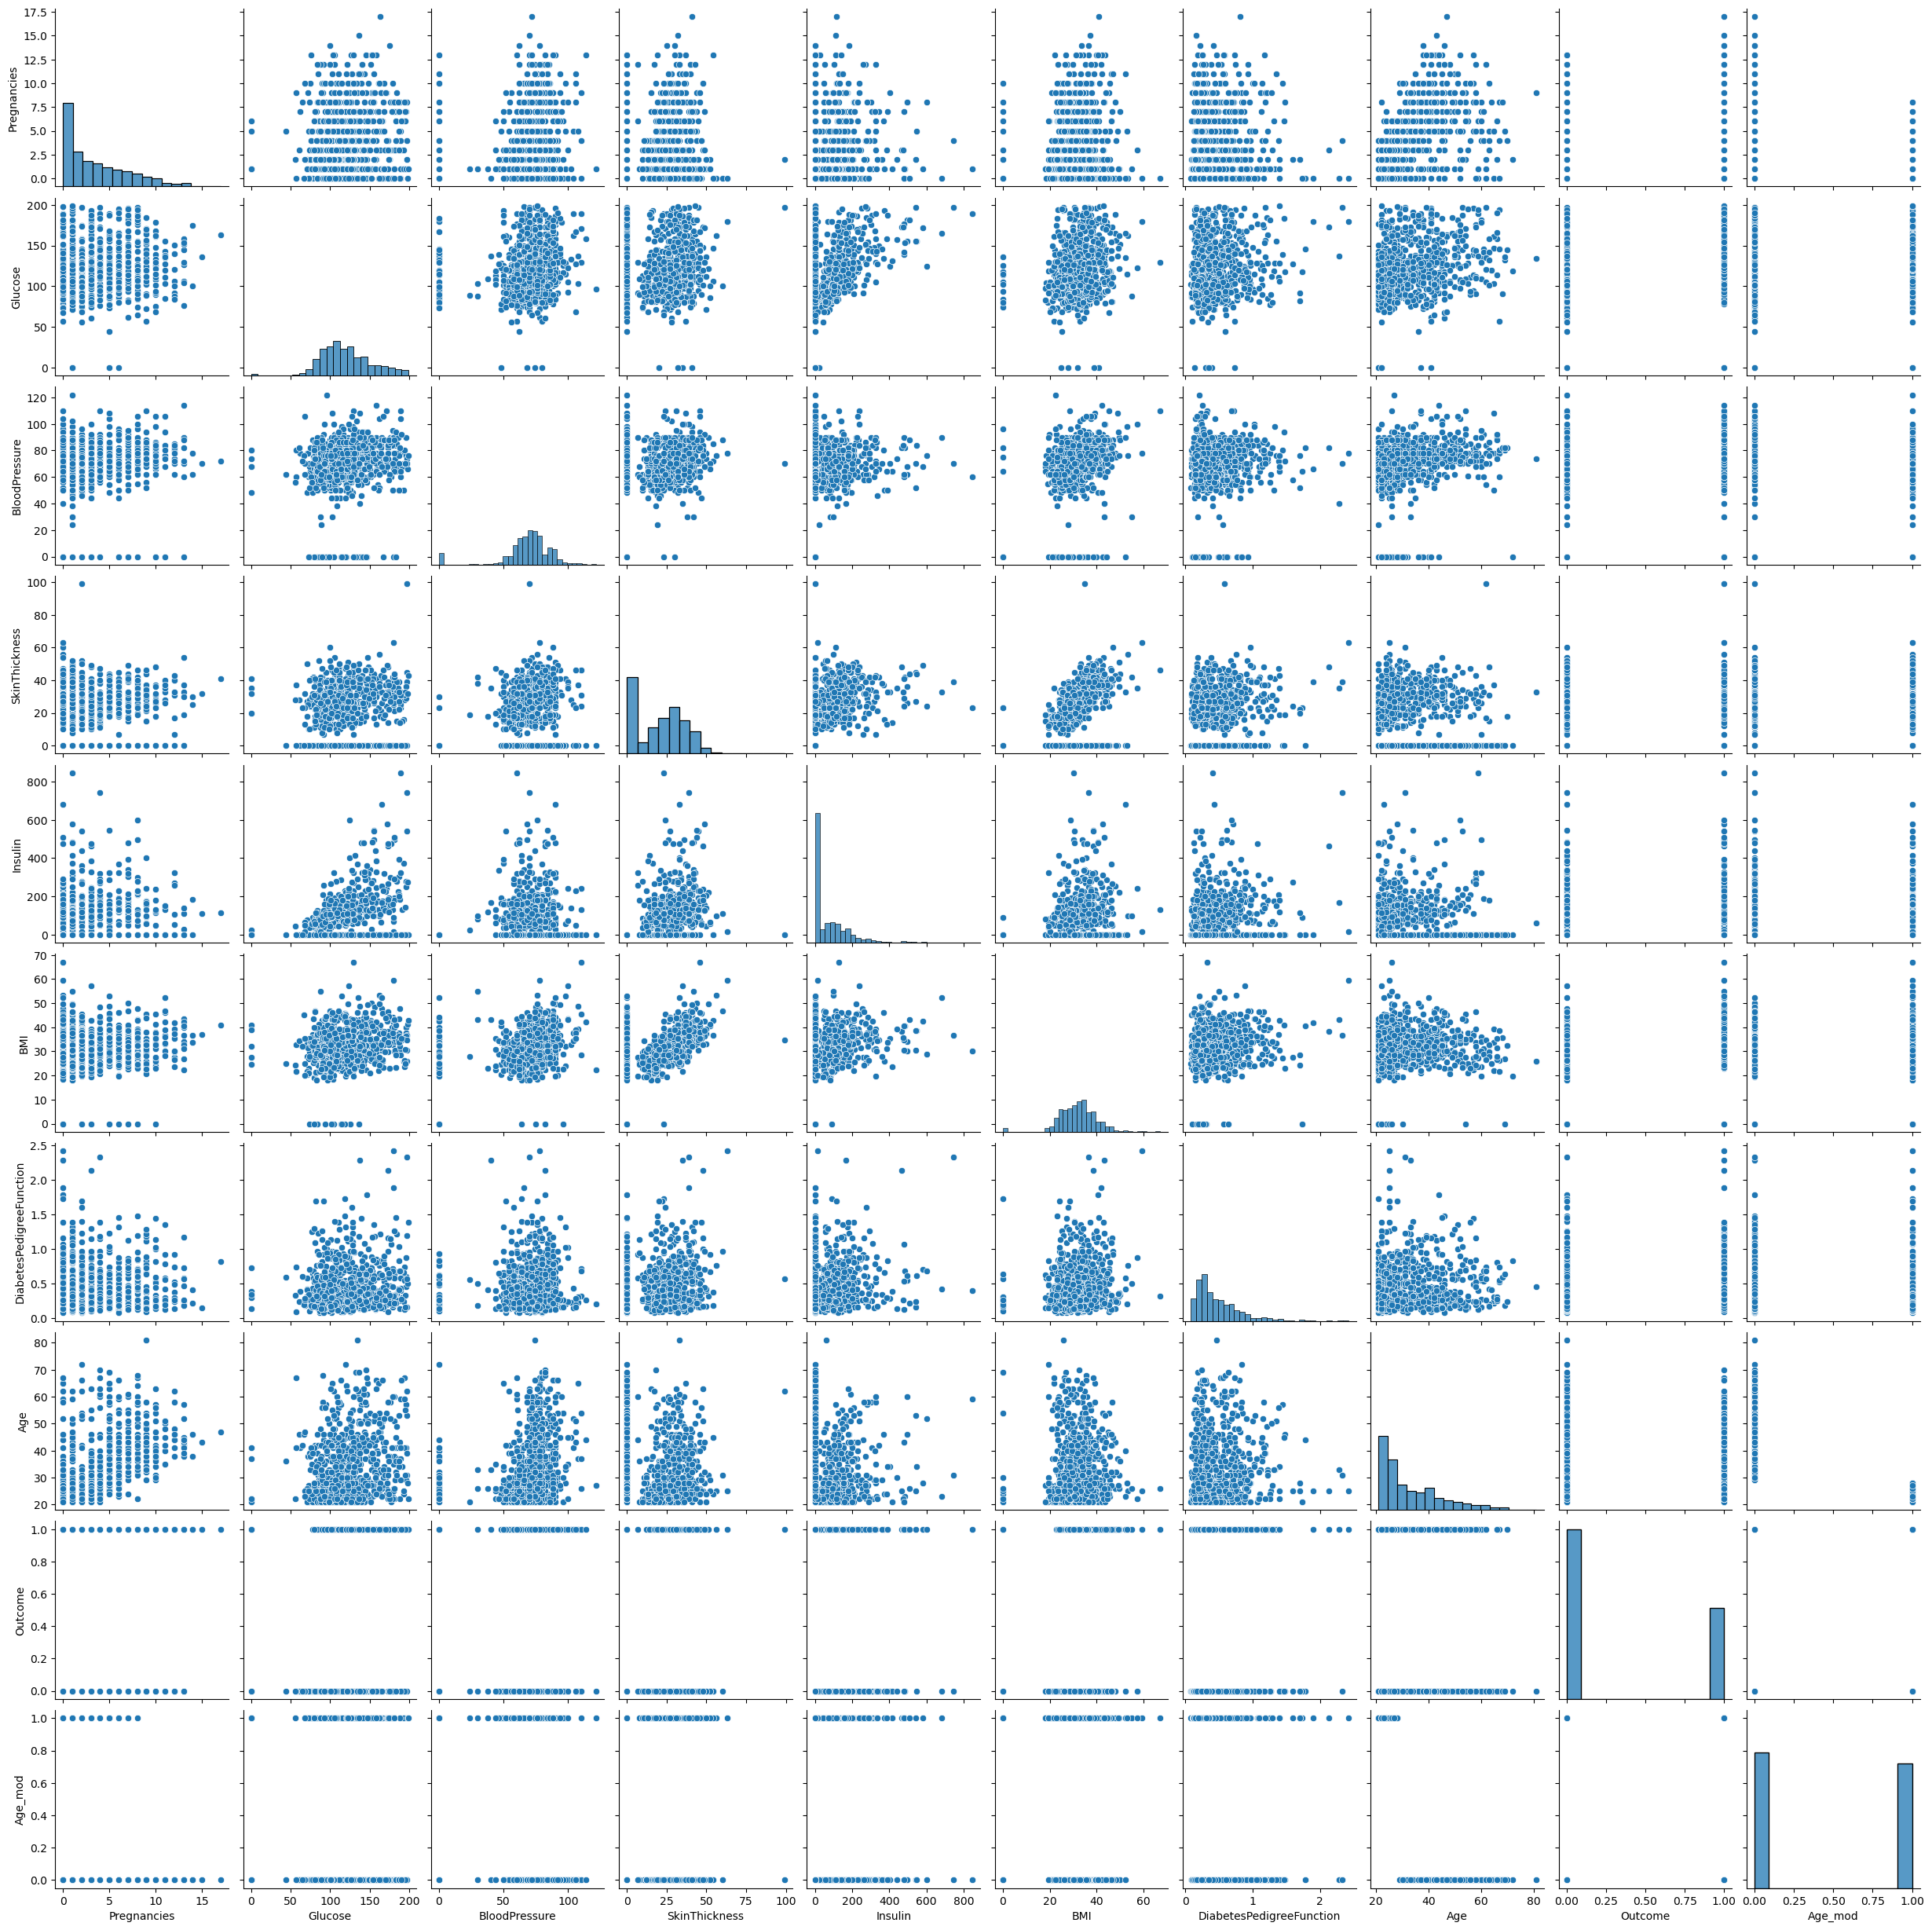

In [14]:
sns.pairplot(dataset)

### Observation:
##### There is very negligible correlation between the features

### EDA

In [15]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_mod
0,6,148,72,35,0,33.6,0.627,50,1,0.0
1,1,85,66,29,0,26.6,0.351,31,0,0.0
2,8,183,64,0,0,23.3,0.672,32,1,0.0
3,1,89,66,23,94,28.1,0.167,21,0,1.0
4,0,137,40,35,168,43.1,2.288,33,1,0.0


#### Creating a function to get the barplots

In [16]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Age_mod'],
      dtype='object')

#### Defined a function called graph that outputs the bar graph for Outcome vs desired column from the dataset

In [17]:
def graph(feature2, color):

    print(plt.bar(dataset['Outcome'], dataset[feature2], color= color))
    print(plt.xlabel('Outcome'))
    print(plt.ylabel(feature2))

### Pregnancies vs Outcome

<BarContainer object of 768 artists>
Text(0.5, 0, 'Outcome')
Text(0, 0.5, 'Pregnancies')


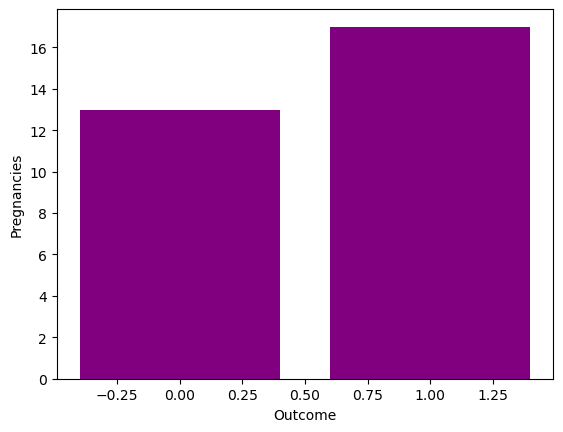

In [18]:
graph('Pregnancies', 'purple')

### Observation:
##### The people who have diabetes have approximately 18 kids and those who don't they have a maximum of 13 kids

### Glucose vs Outcome

<BarContainer object of 768 artists>
Text(0.5, 0, 'Outcome')
Text(0, 0.5, 'Glucose')


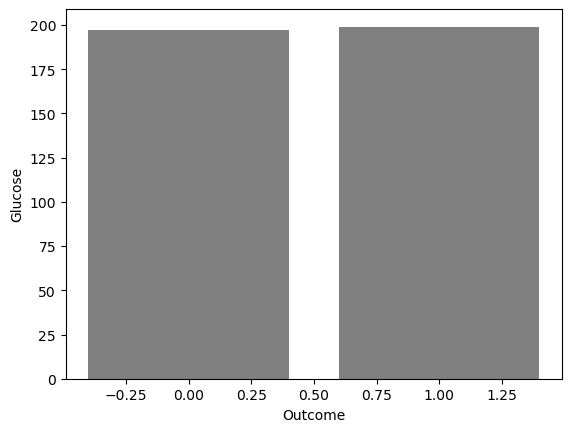

In [19]:
graph('Glucose', 'grey')

### Observation:
##### The people who have diabetes have slightly more glucose levels

In [20]:
a=dataset.columns

### BloodPressure vs Outcome

<BarContainer object of 768 artists>
Text(0.5, 0, 'Outcome')
Text(0, 0.5, 'BloodPressure')


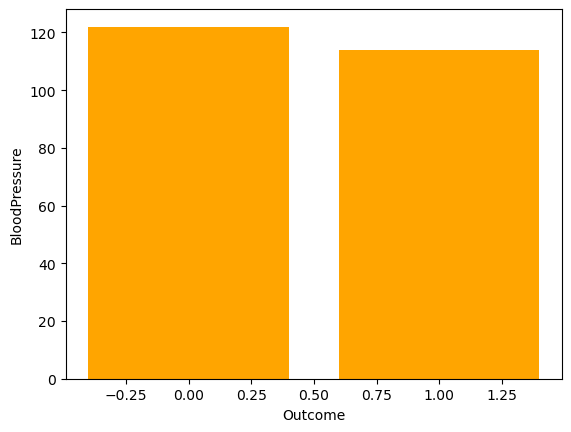

In [21]:
graph('BloodPressure', 'orange')

### Observation:
##### The people who have diabetes have a slight lower blood pressure than those who don't have diabetes

In [22]:
a

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Age_mod'],
      dtype='object')

### SkinThickness vs Outcome

<BarContainer object of 768 artists>
Text(0.5, 0, 'Outcome')
Text(0, 0.5, 'SkinThickness')


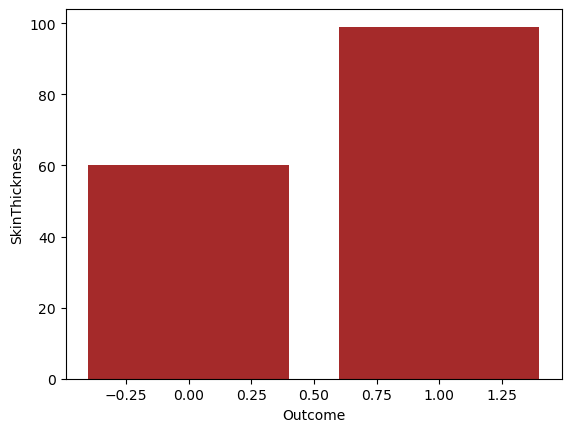

In [23]:
graph('SkinThickness', 'brown')

### Observation:
##### The people who have diabetes have more ski8n thickness (nearly double) than that of a person who has no diabetes

In [24]:
a

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Age_mod'],
      dtype='object')

### Insulin vs Outcome

<BarContainer object of 768 artists>
Text(0.5, 0, 'Outcome')
Text(0, 0.5, 'Insulin')


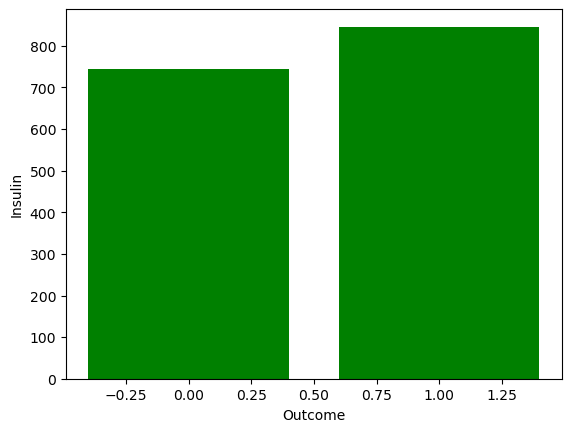

In [25]:
graph('Insulin', 'green')

### Observation:
##### The people who have diabetes have insulin levels greater than 740 and those who don't have diabetes, they have maximum insulin level of 740

In [26]:
a

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Age_mod'],
      dtype='object')

### BMI vs Outcome

<BarContainer object of 768 artists>
Text(0.5, 0, 'Outcome')
Text(0, 0.5, 'BMI')


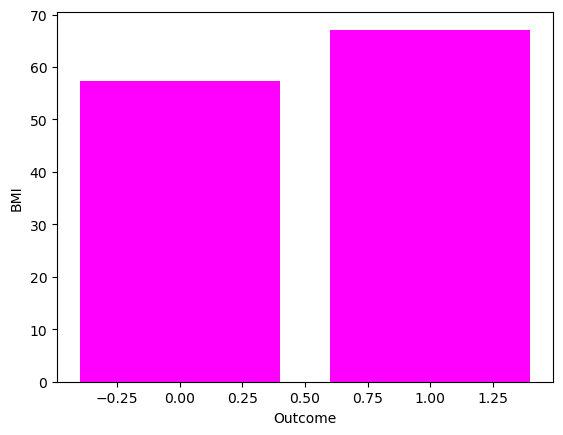

In [27]:
graph('BMI', 'magenta');

### Observation:
##### The people who have diabetes, their BMI levels reach the maximum of 680 and those who don't have diabetes, their BMI levels reach a mximumof 570.

### DiabetesPedigreeFunction vs Outcome

<BarContainer object of 768 artists>
Text(0.5, 0, 'Outcome')
Text(0, 0.5, 'DiabetesPedigreeFunction')


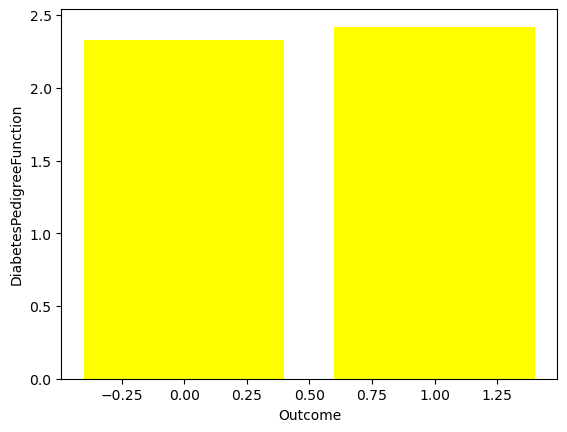

In [28]:
graph('DiabetesPedigreeFunction', 'yellow');

### Observation:
##### The people who have diabetes, their Diabetes Pedigree Function levels reach the maximum of 2.4 and those who don't have diabetes, their DiabetesPedigreeFunction levels reach a mximumof 2.3.

### Age vs Outcome

<BarContainer object of 768 artists>
Text(0.5, 0, 'Outcome')
Text(0, 0.5, 'Age')


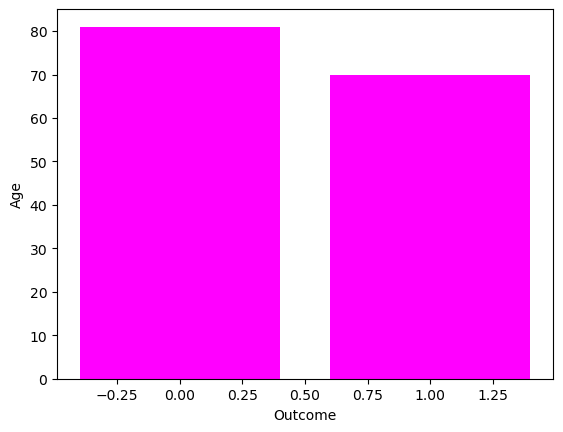

In [29]:
graph('Age', 'magenta');

### Observation:
##### The people who have diabetes, they have a maximum Age of 80 and those who don't have diabetes, their Age is approximately 65.

## Outliers

### Pregnancies

C:\Users\kiran\AppData\Local\Temp\ipykernel_25516\951228210.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Pregnancies'])
C:\Users\kiran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Pregnancies', ylabel='Density'>

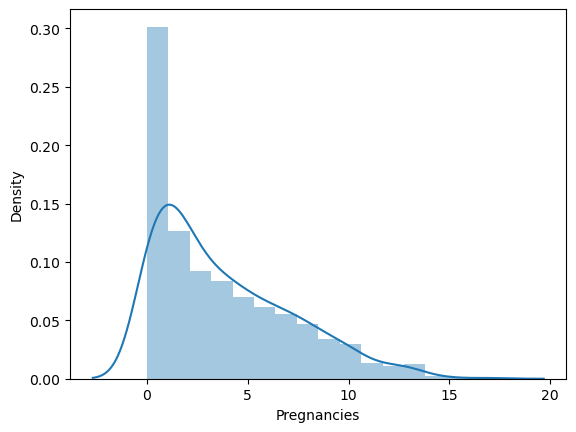

In [30]:
sns.distplot(dataset['Pregnancies'])

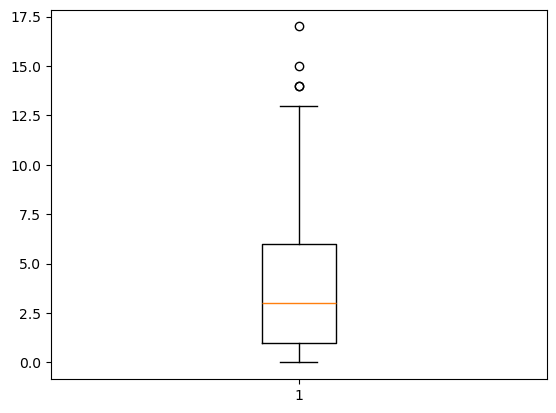

In [31]:
plt.boxplot(dataset['Pregnancies']);

In [32]:
IQR= dataset['Pregnancies'].quantile(0.75)-dataset['Pregnancies'].quantile(0.25)
IQR

5.0

In [33]:
upper_preg=dataset['Pregnancies'].quantile(0.75)+(IQR*3)
upper_preg

21.0

In [34]:
dataset['Pregnancies'].nunique()

17

In [35]:
dataset['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

In [36]:
dataset['Pregnancies'].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

In [37]:
50+45+38+28+24+11+10+9+2+2

219

In [38]:
11+10+9+2+2

34

In [39]:
768-219

549

In [40]:
dataset.shape

(768, 10)

In [41]:
(219*100)/768

28.515625

In [42]:
(34*100)/768

4.427083333333333

In [43]:
dataset['Pregnancies_mod']=dataset['Pregnancies']

In [44]:
dataset.loc[dataset['Pregnancies']> 10, 'Pregnancies_mod']=5

In [45]:
dataset['Pregnancies'].max()

17

In [46]:
dataset['Pregnancies_mod'].max()

10

#### We capped every value > 10 to 10

In [47]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_mod,Pregnancies_mod
0,6,148,72,35,0,33.6,0.627,50,1,0.0,6
1,1,85,66,29,0,26.6,0.351,31,0,0.0,1
2,8,183,64,0,0,23.3,0.672,32,1,0.0,8
3,1,89,66,23,94,28.1,0.167,21,0,1.0,1
4,0,137,40,35,168,43.1,2.288,33,1,0.0,0


### Glucose

C:\Users\kiran\AppData\Local\Temp\ipykernel_25516\3413697017.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Glucose']);
C:\Users\kiran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


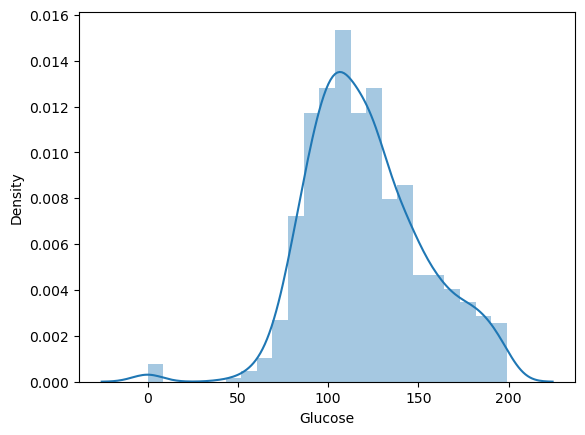

In [48]:
sns.distplot(dataset['Glucose']);

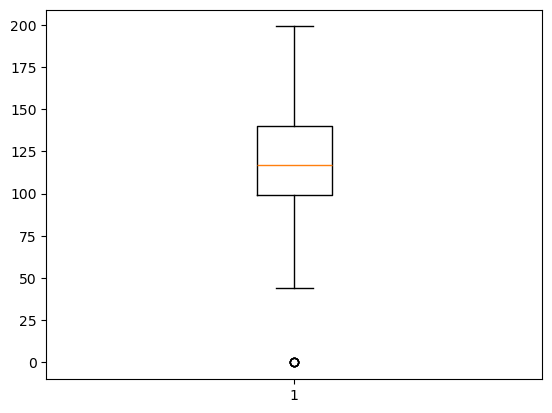

In [49]:
plt.boxplot(dataset['Glucose']);

In [50]:
IQR= dataset['Glucose'].quantile(0.75)-dataset['Glucose'].quantile(0.25)
IQR

41.25

In [51]:
lower_glucose=dataset['Glucose'].quantile(0.25)-(IQR*3)
lower_glucose

-24.75

In [52]:
dataset['Glucose'].min()

0

In [53]:
dataset['Glucose'].max()

199

In [54]:
dataset['Glucose_mod']=dataset['Glucose']

In [55]:
dataset.loc[dataset['Glucose']<20, 'Glucose_mod']=20

In [56]:
dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_mod,Pregnancies_mod,Glucose_mod
0,6,148,72,35,0,33.6,0.627,50,1,0.0,6,148
1,1,85,66,29,0,26.6,0.351,31,0,0.0,1,85
2,8,183,64,0,0,23.3,0.672,32,1,0.0,8,183
3,1,89,66,23,94,28.1,0.167,21,0,1.0,1,89
4,0,137,40,35,168,43.1,2.288,33,1,0.0,0,137
5,5,116,74,0,0,25.6,0.201,30,0,0.0,5,116
6,3,78,50,32,88,31.0,0.248,26,1,1.0,3,78
7,10,115,0,0,0,35.3,0.134,29,0,0.0,10,115
8,2,197,70,45,543,30.5,0.158,53,1,0.0,2,197
9,8,125,96,0,0,0.0,0.232,54,1,0.0,8,125


In [57]:
dataset['Glucose_mod'].min()

20

#### We capped the glucose level < 20 to 20

### Blood Pressure

C:\Users\kiran\AppData\Local\Temp\ipykernel_25516\2509938823.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['BloodPressure'])
C:\Users\kiran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='BloodPressure', ylabel='Density'>

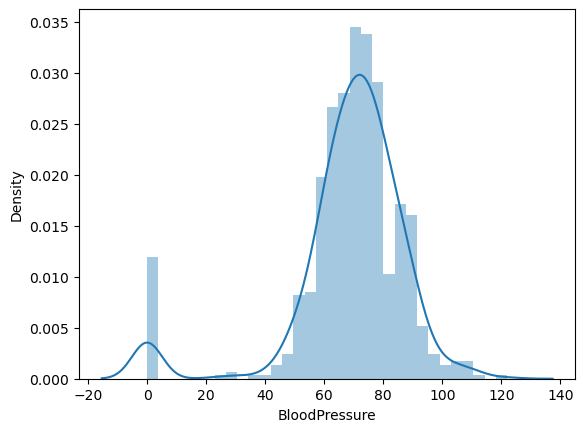

In [58]:
sns.distplot(dataset['BloodPressure'])

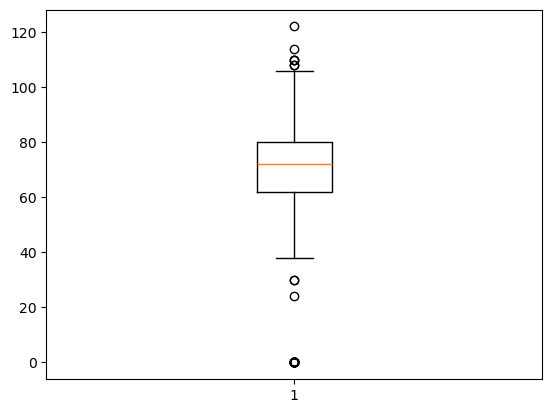

In [59]:
plt.boxplot(dataset['BloodPressure']);

In [60]:
dataset['BloodPressure'].nunique()

47

In [61]:
dataset['BloodPressure'].min()

0

In [62]:
dataset['BloodPressure'].max()

122

In [63]:
IQR= dataset['BloodPressure'].quantile(0.75)-dataset['BloodPressure'].quantile(0.25)
IQR

18.0

In [64]:
lower_bp=dataset['BloodPressure'].quantile(0.25)-(IQR*3)
lower_bp

8.0

In [65]:
upper_bp=dataset['BloodPressure'].quantile(0.75)+(IQR*3)
upper_bp

134.0

In [66]:
dataset['BloodPressure_mod']=dataset['BloodPressure']

In [67]:
dataset.loc[dataset['BloodPressure']<40, 'BloodPressure_mod']=40

In [68]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_mod,Pregnancies_mod,Glucose_mod,BloodPressure_mod
0,6,148,72,35,0,33.6,0.627,50,1,0.0,6,148,72
1,1,85,66,29,0,26.6,0.351,31,0,0.0,1,85,66
2,8,183,64,0,0,23.3,0.672,32,1,0.0,8,183,64
3,1,89,66,23,94,28.1,0.167,21,0,1.0,1,89,66
4,0,137,40,35,168,43.1,2.288,33,1,0.0,0,137,40


In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

#### We capped the bp <40 to 40

### Skin Thickness

C:\Users\kiran\AppData\Local\Temp\ipykernel_25516\1550414908.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['SkinThickness']);
C:\Users\kiran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


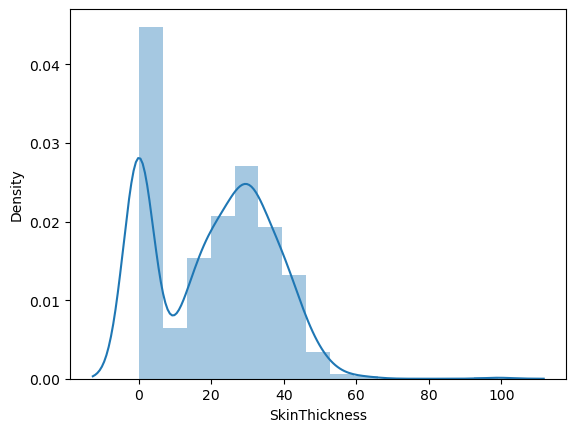

In [70]:
sns.distplot(dataset['SkinThickness']);

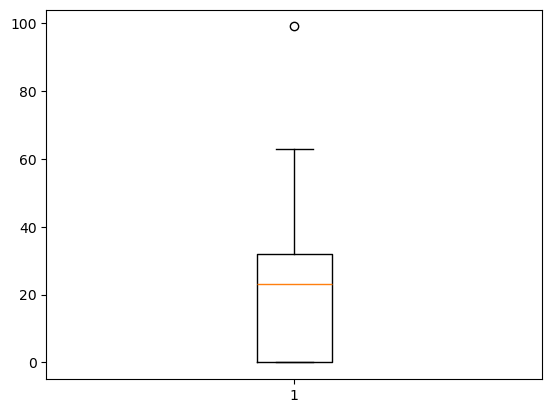

In [71]:
plt.boxplot(dataset['SkinThickness']);

In [72]:
dataset['SkinThickness'].max()

99

In [73]:
dataset['SkinThickness'].min()

0

In [74]:
dataset['SkinThickness_mod']=dataset['SkinThickness']

In [75]:
dataset.loc[dataset['SkinThickness']<2, 'SkinThickness_mod']=2

In [76]:
IQ1R= dataset['SkinThickness'].quantile(0.75)-dataset['SkinThickness'].quantile(0.25)
IQ1R

32.0

In [77]:
upperst=dataset['SkinThickness'].quantile(0.75)+(IQ1R*3)
upperst

128.0

In [78]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_mod,Pregnancies_mod,Glucose_mod,BloodPressure_mod,SkinThickness_mod
0,6,148,72,35,0,33.6,0.627,50,1,0.0,6,148,72,35
1,1,85,66,29,0,26.6,0.351,31,0,0.0,1,85,66,29
2,8,183,64,0,0,23.3,0.672,32,1,0.0,8,183,64,2
3,1,89,66,23,94,28.1,0.167,21,0,1.0,1,89,66,23
4,0,137,40,35,168,43.1,2.288,33,1,0.0,0,137,40,35


### Insulin

C:\Users\kiran\AppData\Local\Temp\ipykernel_25516\681389340.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Insulin']);
C:\Users\kiran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


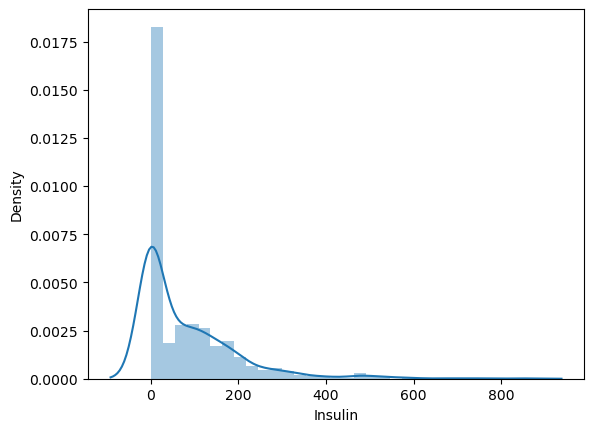

In [79]:
sns.distplot(dataset['Insulin']);

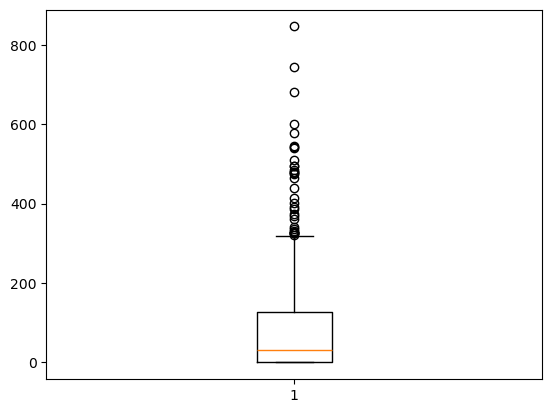

In [80]:
plt.boxplot(dataset['Insulin']);

In [81]:
dataset['Insulin'].min()

0

In [82]:
dataset['Insulin'].max()

846

In [83]:
dataset['Insulin_mod']=dataset['Insulin']

In [84]:
dataset.loc[dataset['Insulin']<23, 'Insulin_mod']=23


In [85]:
IQ1R= dataset['Insulin'].quantile(0.75)-dataset['Insulin'].quantile(0.25)
IQ1R

127.25

In [86]:
upper_IQR=dataset['Insulin'].quantile(0.75)+(IQ1R*3)
upper_IQR

509.0

In [87]:
dataset.loc[dataset['Insulin']>509, 'Insulin_mod']=509

In [88]:
dataset['Insulin_mod'].min()

23

In [89]:
dataset['Insulin_mod'].max()

509

In [90]:
dataset['Insulin_mod'].max()

509

In [91]:
dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_mod,Pregnancies_mod,Glucose_mod,BloodPressure_mod,SkinThickness_mod,Insulin_mod
0,6,148,72,35,0,33.6,0.627,50,1,0.0,6,148,72,35,23
1,1,85,66,29,0,26.6,0.351,31,0,0.0,1,85,66,29,23
2,8,183,64,0,0,23.3,0.672,32,1,0.0,8,183,64,2,23
3,1,89,66,23,94,28.1,0.167,21,0,1.0,1,89,66,23,94
4,0,137,40,35,168,43.1,2.288,33,1,0.0,0,137,40,35,168
5,5,116,74,0,0,25.6,0.201,30,0,0.0,5,116,74,2,23
6,3,78,50,32,88,31.0,0.248,26,1,1.0,3,78,50,32,88
7,10,115,0,0,0,35.3,0.134,29,0,0.0,10,115,40,2,23
8,2,197,70,45,543,30.5,0.158,53,1,0.0,2,197,70,45,509
9,8,125,96,0,0,0.0,0.232,54,1,0.0,8,125,96,2,23


### BMI

C:\Users\kiran\AppData\Local\Temp\ipykernel_25516\3186949395.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['BMI']);
C:\Users\kiran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


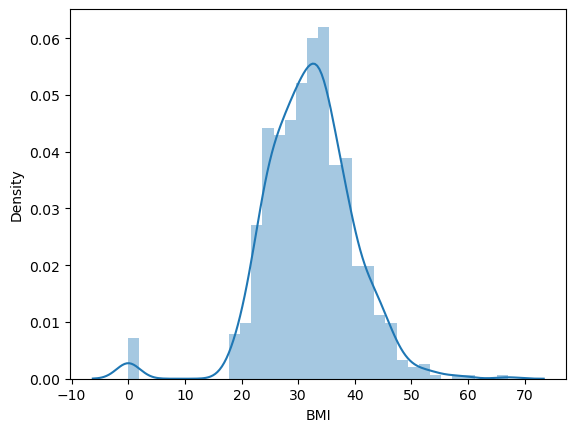

In [92]:
sns.distplot(dataset['BMI']);

### Variance is the spread of data wrt to the mean of that column

In [93]:
dataset['BMI'].describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

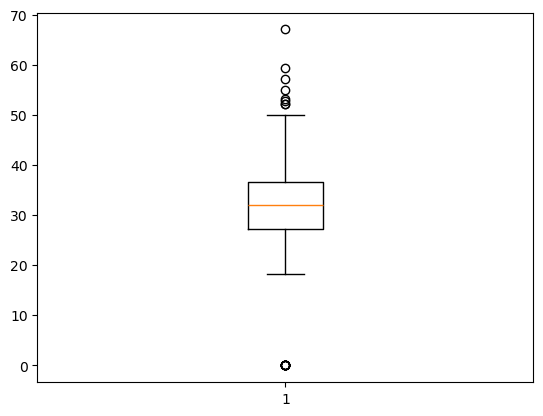

In [94]:
plt.boxplot(dataset['BMI']);

In [95]:
IQ1R= dataset['BMI'].quantile(0.75)-dataset['BMI'].quantile(0.25)
IQ1R

9.3

In [96]:
upper_BMI=dataset['BMI'].quantile(0.75)+(IQ1R*3)
upper_BMI

64.5

In [97]:
dataset['BMI_mod']=dataset['BMI']

In [98]:
dataset.loc[dataset['BMI']<15, 'BMI_mod']=15
dataset.loc[dataset['BMI']>64.5, 'BMI_mod']=64.5

In [99]:
print("BMI:")
print(dataset['BMI'].describe())
print('------------------------------------------------------')
print("BMI_mod:")
print(dataset['BMI_mod'].describe())

BMI:
count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64
------------------------------------------------------
BMI_mod:
count    768.000000
mean      32.204036
std        7.165761
min       15.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       64.500000
Name: BMI_mod, dtype: float64


In [100]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_mod,Pregnancies_mod,Glucose_mod,BloodPressure_mod,SkinThickness_mod,Insulin_mod,BMI_mod
0,6,148,72,35,0,33.6,0.627,50,1,0.0,6,148,72,35,23,33.6
1,1,85,66,29,0,26.6,0.351,31,0,0.0,1,85,66,29,23,26.6
2,8,183,64,0,0,23.3,0.672,32,1,0.0,8,183,64,2,23,23.3
3,1,89,66,23,94,28.1,0.167,21,0,1.0,1,89,66,23,94,28.1
4,0,137,40,35,168,43.1,2.288,33,1,0.0,0,137,40,35,168,43.1


### DiabetesPedigreeFunction

C:\Users\kiran\AppData\Local\Temp\ipykernel_25516\471758895.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['DiabetesPedigreeFunction']);
C:\Users\kiran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


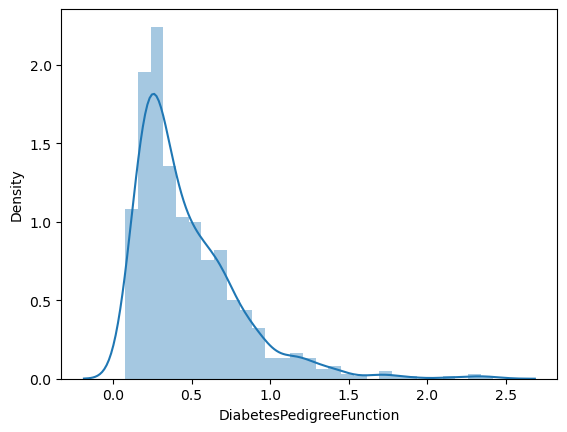

In [101]:
sns.distplot(dataset['DiabetesPedigreeFunction']);

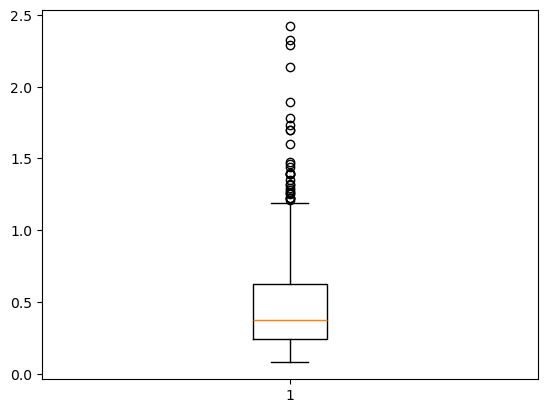

In [102]:
plt.boxplot(dataset['DiabetesPedigreeFunction']);

In [103]:
dataset['DiabetesPedigreeFunction'].describe()

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

In [104]:
dataset['DiabetesPedigreeFunction'].nunique()

517

In [105]:
dataset['DiabetesPedigreeFunction'].unique()

array([0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.248, 0.134, 0.158,
       0.232, 0.191, 0.537, 1.441, 0.398, 0.587, 0.484, 0.551, 0.254,
       0.183, 0.529, 0.704, 0.388, 0.451, 0.263, 0.205, 0.257, 0.487,
       0.245, 0.337, 0.546, 0.851, 0.267, 0.188, 0.512, 0.966, 0.42 ,
       0.665, 0.503, 1.39 , 0.271, 0.696, 0.235, 0.721, 0.294, 1.893,
       0.564, 0.586, 0.344, 0.305, 0.491, 0.526, 0.342, 0.467, 0.718,
       0.962, 1.781, 0.173, 0.304, 0.27 , 0.699, 0.258, 0.203, 0.855,
       0.845, 0.334, 0.189, 0.867, 0.411, 0.583, 0.231, 0.396, 0.14 ,
       0.391, 0.37 , 0.307, 0.102, 0.767, 0.237, 0.227, 0.698, 0.178,
       0.324, 0.153, 0.165, 0.443, 0.261, 0.277, 0.761, 0.255, 0.13 ,
       0.323, 0.356, 0.325, 1.222, 0.179, 0.262, 0.283, 0.93 , 0.801,
       0.207, 0.287, 0.336, 0.247, 0.199, 0.543, 0.192, 0.588, 0.539,
       0.22 , 0.654, 0.223, 0.759, 0.26 , 0.404, 0.186, 0.278, 0.496,
       0.452, 0.403, 0.741, 0.361, 1.114, 0.457, 0.647, 0.088, 0.597,
       0.532, 0.703,

In [106]:
IQ1R= dataset['DiabetesPedigreeFunction'].quantile(0.75)-dataset['DiabetesPedigreeFunction'].quantile(0.25)
IQ1R

0.38249999999999995

In [107]:
upper_DPF=dataset['DiabetesPedigreeFunction'].quantile(0.75)+(IQ1R*3)
upper_DPF

1.77375

In [108]:
dataset['DiabetesPedigreeFunction_mod']=dataset['DiabetesPedigreeFunction']

In [109]:
dataset.loc[dataset['DiabetesPedigreeFunction']>1.77375, 'DiabetesPedigreeFunction_mod']=1.77375


In [110]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_mod,Pregnancies_mod,Glucose_mod,BloodPressure_mod,SkinThickness_mod,Insulin_mod,BMI_mod,DiabetesPedigreeFunction_mod
0,6,148,72,35,0,33.6,0.627,50,1,0.0,6,148,72,35,23,33.6,0.62700
1,1,85,66,29,0,26.6,0.351,31,0,0.0,1,85,66,29,23,26.6,0.35100
2,8,183,64,0,0,23.3,0.672,32,1,0.0,8,183,64,2,23,23.3,0.67200
3,1,89,66,23,94,28.1,0.167,21,0,1.0,1,89,66,23,94,28.1,0.16700
4,0,137,40,35,168,43.1,2.288,33,1,0.0,0,137,40,35,168,43.1,1.77375


In [111]:
dataset.shape

(768, 17)

In [112]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_mod,Pregnancies_mod,Glucose_mod,BloodPressure_mod,SkinThickness_mod,Insulin_mod,BMI_mod,DiabetesPedigreeFunction_mod
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958,0.477865,3.520833,121.024740,70.977865,21.127604,89.735677,32.204036,0.469005
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951,0.499835,2.836176,31.516899,13.725500,15.198534,101.188603,7.165761,0.317492
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,0.000000,0.000000,20.000000,40.000000,2.000000,23.000000,15.000000,0.078000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000,0.000000,1.000000,99.000000,62.000000,2.000000,23.000000,27.300000,0.243750
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000,0.000000,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,1.000000,5.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,1.000000,10.000000,199.000000,122.000000,99.000000,509.000000,64.500000,1.773750


In [113]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Age_mod',
       'Pregnancies_mod', 'Glucose_mod', 'BloodPressure_mod',
       'SkinThickness_mod', 'Insulin_mod', 'BMI_mod',
       'DiabetesPedigreeFunction_mod'],
      dtype='object')

In [114]:
col=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
for i in col:
    dataset.drop([i], axis=1, inplace =
                 True)

In [115]:
dataset.head()

,Outcome,Age_mod,Pregnancies_mod,Glucose_mod,BloodPressure_mod,SkinThickness_mod,Insulin_mod,BMI_mod,DiabetesPedigreeFunction_mod
0,1,0.0,6,148,72,35,23,33.6,0.62700
1,0,0.0,1,85,66,29,23,26.6,0.35100
2,1,0.0,8,183,64,2,23,23.3,0.67200
3,0,1.0,1,89,66,23,94,28.1,0.16700
4,1,0.0,0,137,40,35,168,43.1,1.77375


In [116]:
col=dataset.columns

In [117]:
for i in col:
    print(i,'--->', dataset[i].min())
    
    print(i,'--->', dataset[i].max())
    print("---------------------------------------------")

Outcome ---> 0
Outcome ---> 1
---------------------------------------------
Age_mod ---> 0.0
Age_mod ---> 1.0
---------------------------------------------
Pregnancies_mod ---> 0
Pregnancies_mod ---> 10
---------------------------------------------
Glucose_mod ---> 20
Glucose_mod ---> 199
---------------------------------------------
BloodPressure_mod ---> 40
BloodPressure_mod ---> 122
---------------------------------------------
SkinThickness_mod ---> 2
SkinThickness_mod ---> 99
---------------------------------------------
Insulin_mod ---> 23
Insulin_mod ---> 509
---------------------------------------------
BMI_mod ---> 15.0
BMI_mod ---> 64.5
---------------------------------------------
DiabetesPedigreeFunction_mod ---> 0.078
DiabetesPedigreeFunction_mod ---> 1.77375
---------------------------------------------


# Model Building

In [118]:
X=dataset.drop('Outcome', axis=1)
Y=dataset['Outcome']

In [119]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2,random_state=0)

### Logistic Regression

In [121]:
lr=LogisticRegression()

In [122]:
%%time
lr.fit(X_train,Y_train)

CPU times: total: 31.2 ms
Wall time: 102 ms


C:\Users\kiran\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [123]:
pred_lr= lr.predict(X_test)

In [124]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [125]:
accuracy_lr=accuracy_score(Y_test, pred_lr)
print("Accuracy: %.2f%%" % (accuracy_lr * 100.0))
print("-----------------------------------------------")
print(classification_report(Y_test, pred_lr))
print("-----------------------------------------------")
print(confusion_matrix(Y_test, pred_lr))

Accuracy: 79.87%
-----------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       107
           1       0.70      0.60      0.64        47

    accuracy                           0.80       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.79      0.80      0.79       154

-----------------------------------------------
[[95 12]
 [19 28]]


In [126]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(Y_test, pred_lr)


print(auc_score1*100)

74.17975740703918


## Hyperparameter Tuning

In [127]:
param_grid= [{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
             'C': np.logspace(-4,4,20),
             'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
             'max_iter': [100,500,1000,1500,2000,2500,5000]}]

In [128]:
from sklearn.model_selection import GridSearchCV

In [129]:
clf= GridSearchCV(lr, param_grid= param_grid, cv=3, verbose=True, n_jobs=-1)

In [131]:
%%time
best_clf= clf.fit(X_train, Y_train)

Fitting 3 folds for each of 2800 candidates, totalling 8400 fits
CPU times: total: 8.03 s
Wall time: 1min 25s


C:\Users\kiran\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3780 fits failed out of a total of 8400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
420 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kiran\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kiran\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kiran\anaconda3\Lib\site-packages\sklearn\linear_mode

In [132]:
best_clf.best_estimator_

LogisticRegression(C=0.23357214690901212, solver='newton-cg')

In [133]:
best_clf.best_params_

{'C': 0.23357214690901212,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [134]:
lr2=LogisticRegression(C= 4.281332398719396,penalty='l1',max_iter=100,solver= 'liblinear' )

In [135]:
lr2.fit(X_train,Y_train)

LogisticRegression(C=4.281332398719396, penalty='l1', solver='liblinear')

In [136]:
pred_lr2= lr2.predict(X_test)

In [137]:
accuracy_lr2=accuracy_score(Y_test, pred_lr2)
print("Accuracy: %.2f%%" % (accuracy_lr2 * 100.0))
print("-----------------------------------------------")
print(classification_report(Y_test, pred_lr2))
print("-----------------------------------------------")
print(confusion_matrix(Y_test, pred_lr2))

Accuracy: 79.87%
-----------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       107
           1       0.70      0.60      0.64        47

    accuracy                           0.80       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.79      0.80      0.79       154

-----------------------------------------------
[[95 12]
 [19 28]]


In [138]:
auc_score = roc_auc_score(Y_test, pred_lr2)


print(auc_score)

0.7417975740703917


## SVM

In [139]:
from sklearn import svm

In [140]:
sVm = svm.SVC()

In [141]:
%%time
sVm.fit(X_train,Y_train)

CPU times: total: 15.6 ms
Wall time: 22 ms


SVC()

In [142]:
pred_svm= sVm.predict(X_test)

In [143]:
accuracy_svm=accuracy_score(Y_test, pred_svm)
print("Accuracy: %.2f%%" % (accuracy_svm * 100.0))
print("-----------------------------------------------")
print(classification_report(Y_test, pred_svm))
print("-----------------------------------------------")
print(confusion_matrix(Y_test, pred_svm))

Accuracy: 79.22%
-----------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       107
           1       0.73      0.51      0.60        47

    accuracy                           0.79       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.78      0.79      0.78       154

-----------------------------------------------
[[98  9]
 [23 24]]


In [144]:
 param_grid1=[{'C': [1.0,2.0,0,5.0,6.0,7.0,10.0],
             'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
             'gamma':['scale', 'auto']
             }]

In [145]:
from sklearn.model_selection import RandomizedSearchCV

In [147]:
svm1 = svm.SVC(kernel= 'Linear')

In [148]:
clf_svm_random= RandomizedSearchCV(estimator=svm1,param_distributions=param_grid1,cv=3, verbose=100, n_jobs=-1)

In [150]:
%%time
best_clf_svm= clf_svm_random.fit(X_train, Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


ValueError: X should be a square kernel matrix

In [151]:
X_test.head()

,Age_mod,Pregnancies_mod,Glucose_mod,BloodPressure_mod,SkinThickness_mod,Insulin_mod,BMI_mod,DiabetesPedigreeFunction_mod
661,1.0,1,199,76,43,23,42.9,1.394
122,1.0,2,107,74,30,100,33.6,0.404
113,1.0,4,76,62,2,23,34.0,0.391
14,0.0,5,166,72,19,175,25.8,0.587
529,0.0,0,111,65,2,23,24.6,0.660


## Decision Trees

In [152]:
from sklearn import tree

In [153]:
dt = tree.DecisionTreeClassifier()
#clf = clf.fit(X, Y)

In [154]:
param_grid_dt= [{'criterion': ["gini", "entropy"],
             'splitter': ["best", "random"],
             'max_depth': [5,10,20,25,30,50],
             'max_features': [2,4,6,8,10,"auto", "sqrt", "log2"]}]

In [155]:
clf_svm_random= RandomizedSearchCV(estimator=dt,param_distributions=param_grid_dt,cv=5, verbose=100, n_jobs=-1)

In [156]:
%%time
clf_svm_random.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
CPU times: total: 203 ms
Wall time: 5.82 s


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions=[{'criterion': ['gini', 'entropy'],
                                         'max_depth': [5, 10, 20, 25, 30, 50],
                                         'max_features': [2, 4, 6, 8, 10,
                                                          'auto', 'sqrt',
                                                          'log2'],
                                         'splitter': ['best', 'random']}],
                   verbose=100)

In [157]:
clf_svm_random.best_estimator_

DecisionTreeClassifier(max_depth=5, max_features=10, splitter='random')

In [158]:
clf_svm_random.best_params_

{'splitter': 'random', 'max_features': 10, 'max_depth': 5, 'criterion': 'gini'}

##  Decision Tree

In [159]:
%%time
dt1 = tree.DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=10,max_features='log2')
dtfit = dt1.fit(X_train, Y_train)

CPU times: total: 0 ns
Wall time: 4 ms


In [160]:
pred_dt= dtfit.predict(X_test)

In [161]:
accuracy_dt=accuracy_score(Y_test, pred_dt)
print("Accuracy: %.2f%%" % (accuracy_dt * 100.0))
print("-----------------------------------------------")
print(classification_report(Y_test, pred_dt))
print("-----------------------------------------------")
print(confusion_matrix(Y_test, pred_dt))

Accuracy: 72.73%
-----------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       107
           1       0.56      0.53      0.54        47

    accuracy                           0.73       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.72      0.73      0.73       154

-----------------------------------------------
[[87 20]
 [22 25]]
